### Moving Averages

https://github.com/srivatsan88/End-to-End-Time-Series/blob/master/Moving_Averages.ipynb

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv')
df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,1/1/2016,365,1423.5,219.0,247.73,31
1,2/1/2016,292,1138.8,175.2,234.11,31
2,3/1/2016,130,507.0,78.0,123.85,29
3,4/1/2016,117,456.3,70.2,111.22,29
4,5/1/2016,136,530.4,81.6,118.37,29


In [3]:
from datetime import datetime
df['Bill_Date']= df['Bill_Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))

In [4]:
df.shape

(53, 6)

In [5]:
df.isnull().sum()

Bill_Date        0
On_peak          0
Off_peak         0
Usage_charge     0
Billed_amount    0
Billing_days     0
dtype: int64

In [6]:
df.set_index('Bill_Date', inplace=True)

In [7]:
min_date = df.index.min()
max_date = df.index.max()

min_date, max_date

(Timestamp('2016-01-01 00:00:00'), Timestamp('2020-05-01 00:00:00'))

In [8]:
bill_2018= df['2016':'2018'][["Billed_amount"]]

In [9]:
bill_2018.head()

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37


### Simple Moving average

calculate yt=(yt-1+yt-2+..yt-n)/n

<Axes: xlabel='Bill_Date'>

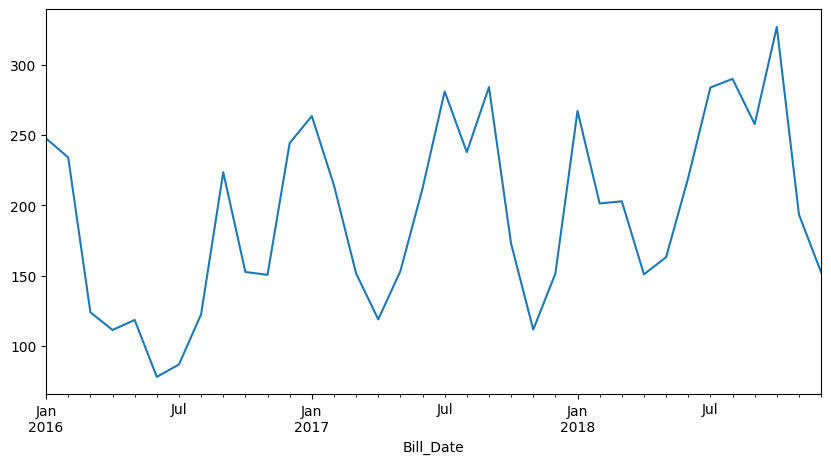

In [10]:
bill_2018["Billed_amount"].plot(kind='line', figsize=(10,5))

In [13]:
bill_2018["ma_rolling_3"]=bill_2018["Billed_amount"].rolling(window=3).mean()

the spikes may not be very visible in moving average, so the data that has a lot of fluctuations is not good to be modelled by MA

<Axes: xlabel='Bill_Date'>

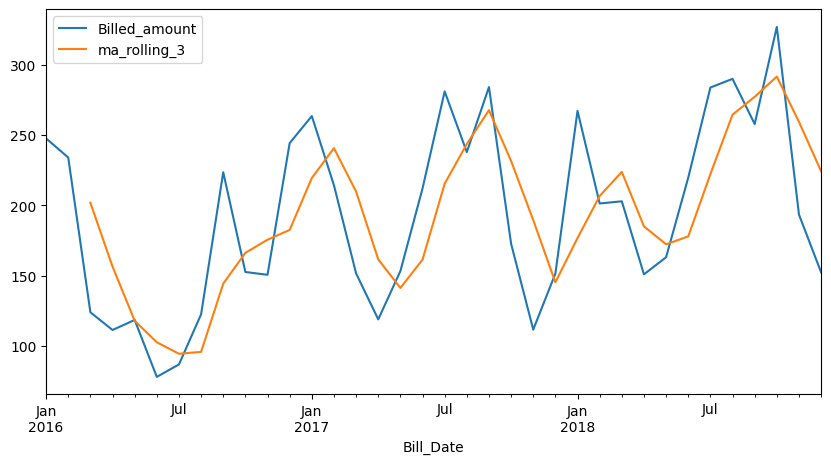

In [14]:
bill_2018[["Billed_amount","ma_rolling_3"]].plot(kind='line', figsize=(10,5))

<Axes: xlabel='Bill_Date'>

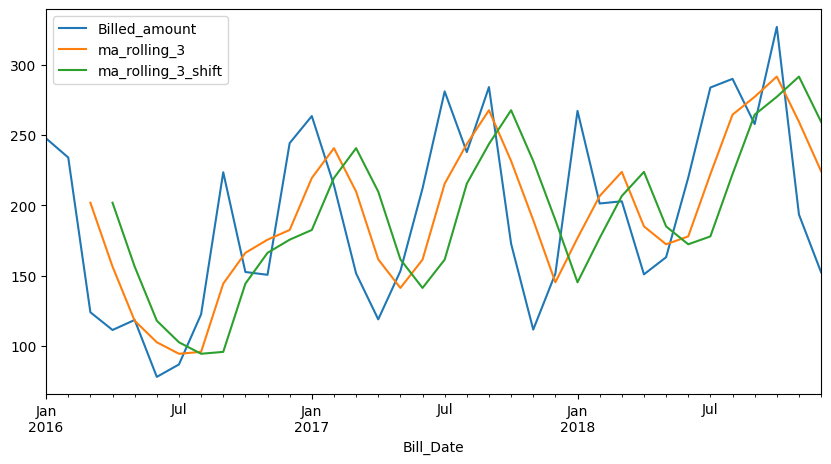

In [16]:
bill_2018["ma_rolling_3_shift"]=bill_2018["Billed_amount"].rolling(window=3).mean().shift(1)
bill_2018[["Billed_amount","ma_rolling_3","ma_rolling_3_shift"]].plot(kind='line', figsize=(10,5))

### Weighted moving average

current_val=((t*weighting factor)+(t-1)*weighting factor(t-1)+...)/n